In [1]:
import pandas as pd
import numpy as np
import re
import string

In [2]:
# Load dataset with proper encoding
df = pd.read_excel(r'C:\Users\DELL\Downloads\Combined_Data.xlsx', engine='openpyxl')
df.dropna(inplace=True)

In [3]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    return text

In [4]:
df.head(4)

,Date,From,To,Subject,Body
0,"Tue, 19 Nov 2024 08:13:09 +0000 (UTC)",Career Navigator 2024* <newsletters-noreply@li...,Ajay Mane <ajaymane5885@gmail.com>,Infosys Walk-In for IT Operations | 21st Nov 2024,Career Navigator 2024*By AMISHA BHATTBy AMISHA...
1,"Wed, 20 Nov 2024 06:13:07 +0000 (UTC)",Work From Home Jobs <newsletters-noreply@linke...,Ajay Mane <ajaymane5885@gmail.com>,Genpact Jobs Gurgaon for Freshers| Best Opport...,Work From Home JobsBy Work From Home/ Experien...
2,"Tue, 19 Nov 2024 06:13:07 +0000 (UTC)",Work From Home Jobs <newsletters-noreply@linke...,Ajay Mane <ajaymane5885@gmail.com>,Genpact Jobs Noida for Freshers| Best Opportun...,Work From Home JobsBy Work From Home/ Experien...
3,"Mon, 18 Nov 2024 14:33:15 +0000 (UTC)",LinkedIn <updates-noreply@linkedin.com>,Ajay Mane <ajaymane5885@gmail.com>,Vaibhav Kadam just posted something that might...,---------------------------------------- ...


In [5]:
df['processed_text'] = df['Body'].apply(preprocess_text)

In [6]:
df.shape

(32016, 6)

In [7]:
df.isnull().sum()

Date              0
From              0
To                0
Subject           0
Body              0
processed_text    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32016 entries, 0 to 55435
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            32016 non-null  object
 1   From            32016 non-null  object
 2   To              32016 non-null  object
 3   Subject         32016 non-null  object
 4   Body            32016 non-null  object
 5   processed_text  32016 non-null  object
dtypes: object(6)
memory usage: 1.7+ MB


In [9]:
df.dtypes

Date              object
From              object
To                object
Subject           object
Body              object
processed_text    object
dtype: object

In [10]:
# Ensure TensorFlow is installed
%pip install tensorflow==2.10.0

# Ensure TensorFlow is imported correctly
try:
	from tensorflow.keras.preprocessing.text import Tokenizer
	from tensorflow.keras.preprocessing.sequence import pad_sequences

	# Tokenization for LSTM
	tokenizer = Tokenizer(num_words=5000)
	tokenizer.fit_on_texts(df['processed_text'])
	sequences = tokenizer.texts_to_sequences(df['processed_text'])
	X_lstm = pad_sequences(sequences, maxlen=50)
except ImportError as e:
	print("Error importing TensorFlow:", e)
	print("Please ensure TensorFlow is installed correctly and is compatible with your system.")


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Load dataset with proper encoding
df = pd.read_excel(r'C:\Users\DELL\Downloads\Combined_Data.xlsx')

# Print dataset size
print("Dataset Shape:", df.shape)  # Should print (578, X) if all rows are loaded
print(df.head())  # Show first few rows

Dataset Shape: (55436, 5)
                                    Date  \
0  Tue, 19 Nov 2024 08:13:09 +0000 (UTC)   
1  Wed, 20 Nov 2024 06:13:07 +0000 (UTC)   
2  Tue, 19 Nov 2024 06:13:07 +0000 (UTC)   
3  Mon, 18 Nov 2024 14:33:15 +0000 (UTC)   
4  Fri, 29 Nov 2024 01:50:12 +0000 (UTC)   

                                                From  \
0  Career Navigator 2024* <newsletters-noreply@li...   
1  Work From Home Jobs <newsletters-noreply@linke...   
2  Work From Home Jobs <newsletters-noreply@linke...   
3            LinkedIn <updates-noreply@linkedin.com>   
4      Aarushi from foundit <info@alerts.foundit.in>   

                                   To  \
0  Ajay Mane <ajaymane5885@gmail.com>   
1  Ajay Mane <ajaymane5885@gmail.com>   
2  Ajay Mane <ajaymane5885@gmail.com>   
3  Ajay Mane <ajaymane5885@gmail.com>   
4              ajaymane5885@gmail.com   

                                             Subject  \
0  Infosys Walk-In for IT Operations | 21st Nov 2024   
1  Genpact Jo

In [12]:
# Check if the dataset is loading properly
print("Total Rows in Dataset:", df.shape[0])

# Define spam keywords
spam_keywords = ["win", "free", "winner", "click", "prize", "money", "urgent"]

# Function to classify emails
def classify_email(text):
    if pd.isna(text):  # Handle missing values
        return "ham"
    text = text.lower()  # Convert to lowercase
    if any(word in text for word in spam_keywords):
        return "spam"
    return "ham"

# Apply classification to ALL rows (not just one row)
df["category"] = df.apply(lambda row: classify_email(str(row["Subject"]) + " " + str(row["Body"])), axis=1)

# Convert category to numerical (ham=0, spam=1)
df["category"] = df["category"].map({"ham": 0, "spam": 1})

# Verify all rows are classified
print(df[["Subject", "Body", "category"]].head())  # Show first few rows
print("Total Rows Classified:", df.shape[0])  # Should be 578+ rows

# Save the classified dataset
df.to_csv("classified_emails.csv", index=False)

Total Rows in Dataset: 55436
                                             Subject  \
0  Infosys Walk-In for IT Operations | 21st Nov 2024   
1  Genpact Jobs Gurgaon for Freshers| Best Opport...   
2  Genpact Jobs Noida for Freshers| Best Opportun...   
3  Vaibhav Kadam just posted something that might...   
4             Hunt for jobs the right way, Jobseeker   

                                                Body  category  
0  Career Navigator 2024*By AMISHA BHATTBy AMISHA...         0  
1  Work From Home JobsBy Work From Home/ Experien...         0  
2  Work From Home JobsBy Work From Home/ Experien...         1  
3  ----------------------------------------      ...         0  
4  <!DOCTYPE html><html xmlns:v="urn:schemas-micr...         1  
Total Rows Classified: 55436


In [13]:
df.category.value_counts()

category
0    36268
1    19168
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_13704\2856690576.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_senders.values, y=top_senders.index, palette="viridis")


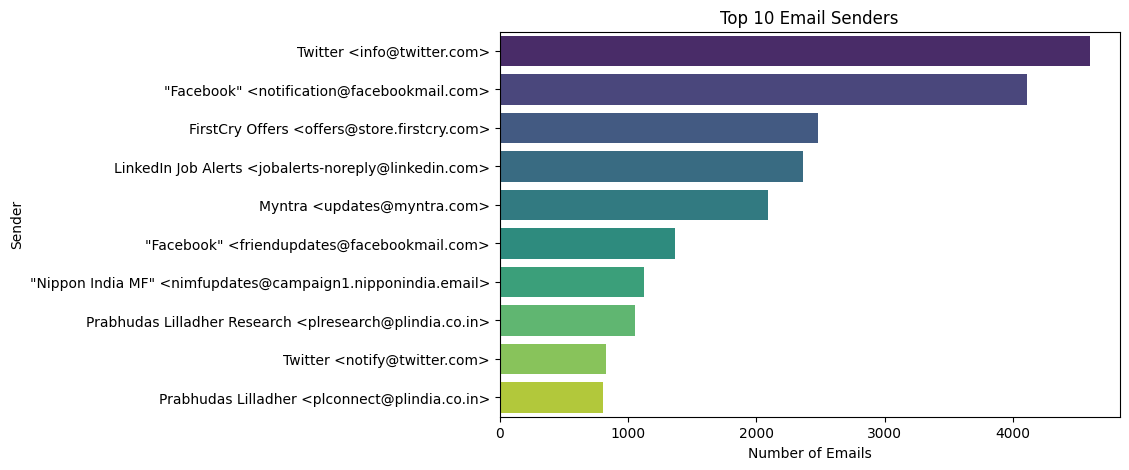

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 senders
top_senders = df['From'].value_counts().head(10)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_senders.values, y=top_senders.index, palette="viridis")
plt.title("Top 10 Email Senders")
plt.xlabel("Number of Emails")
plt.ylabel("Sender")
plt.show()

In [15]:
# from wordcloud import WordCloud

# # Generate word cloud
# subject_text = " ".join(df['Subject'].dropna().tolist())
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subject_text)

# # Plot
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.title("Word Cloud of Email Subjects")
# plt.axis("off")
# plt.show()

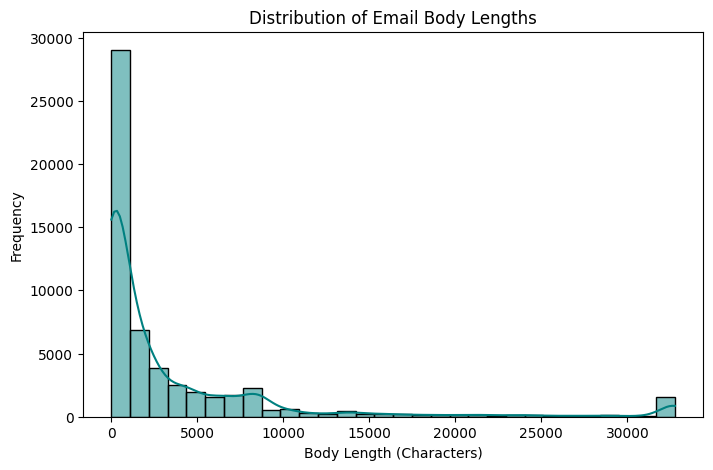

In [16]:
# Compute body length
df['Body_Length'] = df['Body'].fillna("").apply(len)

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(df['Body_Length'], bins=30, kde=True, color="teal")
plt.title("Distribution of Email Body Lengths")
plt.xlabel("Body Length (Characters)")
plt.ylabel("Frequency")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13704\1936846241.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13704\1936846241.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette="coolwarm")


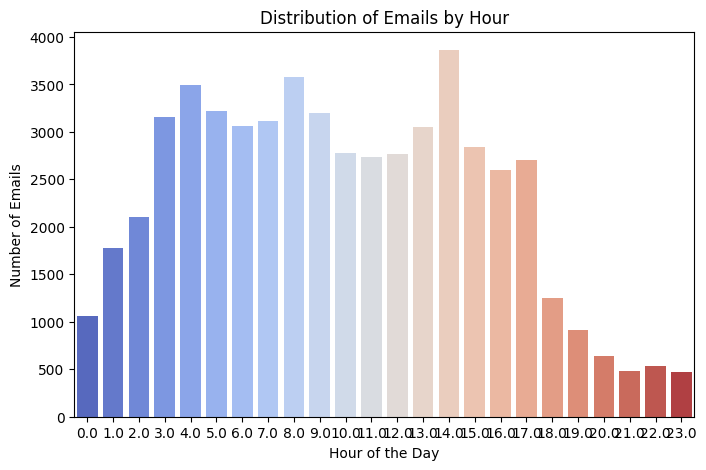

In [17]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)
df['Hour'] = df['Date'].dt.hour

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Hour', data=df, palette="coolwarm")
plt.title("Distribution of Emails by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Emails")
plt.show()

In [18]:
df.head()

,Date,From,To,Subject,Body,category,Body_Length,Hour
0,2024-11-19 08:13:09+00:00,Career Navigator 2024* <newsletters-noreply@li...,Ajay Mane <ajaymane5885@gmail.com>,Infosys Walk-In for IT Operations | 21st Nov 2024,Career Navigator 2024*By AMISHA BHATTBy AMISHA...,0,3720,8.0
1,2024-11-20 06:13:07+00:00,Work From Home Jobs <newsletters-noreply@linke...,Ajay Mane <ajaymane5885@gmail.com>,Genpact Jobs Gurgaon for Freshers| Best Opport...,Work From Home JobsBy Work From Home/ Experien...,0,3754,6.0
2,2024-11-19 06:13:07+00:00,Work From Home Jobs <newsletters-noreply@linke...,Ajay Mane <ajaymane5885@gmail.com>,Genpact Jobs Noida for Freshers| Best Opportun...,Work From Home JobsBy Work From Home/ Experien...,1,4078,6.0
3,2024-11-18 14:33:15+00:00,LinkedIn <updates-noreply@linkedin.com>,Ajay Mane <ajaymane5885@gmail.com>,Vaibhav Kadam just posted something that might...,---------------------------------------- ...,0,7924,14.0
4,2024-11-29 01:50:12+00:00,Aarushi from foundit <info@alerts.foundit.in>,ajaymane5885@gmail.com,"Hunt for jobs the right way, Jobseeker","<!DOCTYPE html><html xmlns:v=""urn:schemas-micr...",1,8753,1.0


In [19]:
df = df.drop(columns=['Date'])


In [20]:
import re
import pandas as pd


# Convert 'Date' column to datetime
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Textual Features
df['Subject_Length'] = df['Subject'].fillna("").apply(len)
df['Subject_Word_Count'] = df['Subject'].fillna("").apply(lambda x: len(str(x).split()))
df['Body_Word_Count'] = df['Body'].fillna("").apply(lambda x: len(str(x).split()))
df['Link_Count'] = df['Body'].fillna("").apply(lambda x: len(re.findall(r'http[s]?://\S+', str(x))))
df['Special_Char_Count'] = df['Body'].fillna("").apply(lambda x: len(re.findall(r'[!@#$%^&*(),.?":{}|<>]', str(x))))

# Date Features
# df['Day_of_Week'] = df['Date'].dt.day_name()
# df['Month'] = df['Date'].dt.month_name()

# Display the updated dataset with the new features
df_features = df.head()
df_features


,From,To,Subject,Body,category,Body_Length,Hour,Subject_Length,Subject_Word_Count,Body_Word_Count,Link_Count,Special_Char_Count
0,Career Navigator 2024* <newsletters-noreply@li...,Ajay Mane <ajaymane5885@gmail.com>,Infosys Walk-In for IT Operations | 21st Nov 2024,Career Navigator 2024*By AMISHA BHATTBy AMISHA...,0,3720,8.0,49,9,68,5,117
1,Work From Home Jobs <newsletters-noreply@linke...,Ajay Mane <ajaymane5885@gmail.com>,Genpact Jobs Gurgaon for Freshers| Best Opport...,Work From Home JobsBy Work From Home/ Experien...,0,3754,6.0,53,7,79,5,118
2,Work From Home Jobs <newsletters-noreply@linke...,Ajay Mane <ajaymane5885@gmail.com>,Genpact Jobs Noida for Freshers| Best Opportun...,Work From Home JobsBy Work From Home/ Experien...,1,4078,6.0,51,7,126,5,125
3,LinkedIn <updates-noreply@linkedin.com>,Ajay Mane <ajaymane5885@gmail.com>,Vaibhav Kadam just posted something that might...,---------------------------------------- ...,0,7924,14.0,68,12,244,11,274
4,Aarushi from foundit <info@alerts.foundit.in>,ajaymane5885@gmail.com,"Hunt for jobs the right way, Jobseeker","<!DOCTYPE html><html xmlns:v=""urn:schemas-micr...",1,8753,1.0,38,7,259,6,822


In [21]:
# Function to automatically label emails based on keywords
def auto_label(subject, body):
    # Convert to lowercase for uniformity
    subject = str(subject).lower()
    body = str(body).lower()
    
    # Spam keywords
    spam_keywords = ["unsubscribe", "win", "click here", "free", "claim", "urgent", "limited offer"]
    if any(keyword in subject or keyword in body for keyword in spam_keywords):
        return "Spam"
    
    # Promotion keywords
    promo_keywords = ["offer", "deal", "discount", "sale", "coupon", "promo", "clearance"]
    if any(keyword in subject or keyword in body for keyword in promo_keywords):
        return "Promotion"
    
    # Social keywords
    social_keywords = ["friend request", "like", "comment", "follow", "connection"]
    if any(keyword in subject or keyword in body for keyword in social_keywords):
        return "Social"
    
    # Update keywords
    update_keywords = ["update", "newsletter", "report", "summary", "digest"]
    if any(keyword in subject or keyword in body for keyword in update_keywords):
        return "Updates"
    
    # Default to Primary (Ham)
    return "Primary"

# Apply the automatic labeling function
df['Label'] = df.apply(lambda row: auto_label(row['Subject'], row['Body']), axis=1)

# Display some labeled data samples to verify
df[['From', 'Subject', 'Body', 'Label']].head(20)
# Display the updated dataset with the new labels
# Create a new dataframe with the new column 'Label'
df1 = df.copy()

# Display the updated dataset with the new labels
df1.head()

,From,To,Subject,Body,category,Body_Length,Hour,Subject_Length,Subject_Word_Count,Body_Word_Count,Link_Count,Special_Char_Count,Label
0,Career Navigator 2024* <newsletters-noreply@li...,Ajay Mane <ajaymane5885@gmail.com>,Infosys Walk-In for IT Operations | 21st Nov 2024,Career Navigator 2024*By AMISHA BHATTBy AMISHA...,0,3720,8.0,49,9,68,5,117,Spam
1,Work From Home Jobs <newsletters-noreply@linke...,Ajay Mane <ajaymane5885@gmail.com>,Genpact Jobs Gurgaon for Freshers| Best Opport...,Work From Home JobsBy Work From Home/ Experien...,0,3754,6.0,53,7,79,5,118,Spam
2,Work From Home Jobs <newsletters-noreply@linke...,Ajay Mane <ajaymane5885@gmail.com>,Genpact Jobs Noida for Freshers| Best Opportun...,Work From Home JobsBy Work From Home/ Experien...,1,4078,6.0,51,7,126,5,125,Spam
3,LinkedIn <updates-noreply@linkedin.com>,Ajay Mane <ajaymane5885@gmail.com>,Vaibhav Kadam just posted something that might...,---------------------------------------- ...,0,7924,14.0,68,12,244,11,274,Spam
4,Aarushi from foundit <info@alerts.foundit.in>,ajaymane5885@gmail.com,"Hunt for jobs the right way, Jobseeker","<!DOCTYPE html><html xmlns:v=""urn:schemas-micr...",1,8753,1.0,38,7,259,6,822,Spam


In [22]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [23]:
import pandas as pd
import re

def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['processed_text'] = df['Body'].apply(preprocess_text)  # Ensure correct column name

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['processed_text'])

In [25]:
X.shape

(55436, 677732)

In [26]:
Y = df['Label'].values

In [27]:
Y

array(['Spam', 'Spam', 'Spam', ..., 'Spam', 'Primary', 'Spam'],
      dtype=object)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30,random_state=40)

In [29]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

MultinomialNB()

In [30]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
print("Naive Bayes Results:\n", classification_report(Y_test, Y_pred))

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Naive Bayes Results:
               precision    recall  f1-score   support

     Primary       0.62      0.13      0.22      5164
   Promotion       0.74      0.41      0.53       746
      Social       0.65      0.10      0.18       587
        Spam       0.62      0.95      0.75      9747
     Updates       0.69      0.12      0.21       387

    accuracy                           0.63     16631
   macro avg       0.66      0.34      0.38     16631
weighted avg       0.63      0.63      0.54     16631

[[ 680    6    6 4469    3]
 [  51  305    2  387    1]
 [  39    2   60  486    0]
 [ 300   98   24 9307   18]
 [  23    0    0  316   48]]


In [32]:
from sklearn.linear_model import LogisticRegression  # Import the missing module
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

# Evaluation
Y_pred = lr_model.predict(X_test)
print("Logistic Regression Results:\n", classification_report(Y_test, Y_pred))

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
               precision    recall  f1-score   support

     Primary       0.77      0.96      0.86      5164
   Promotion       0.78      0.34      0.47       746
      Social       0.57      0.13      0.22       587
        Spam       0.97      0.96      0.97      9747
     Updates       0.60      0.16      0.25       387

    accuracy                           0.89     16631
   macro avg       0.74      0.51      0.55     16631
weighted avg       0.88      0.89      0.87     16631

[[4970    8   12  162   12]
 [ 438  251   10   40    7]
 [ 443    8   78   53    5]
 [ 279   52   37 9361   18]
 [ 294    1    0   30   62]]


In [33]:
# 1. Import additional libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
# # 2. Vectorize the processed text
# vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
# X = vectorizer.fit_transform(df['processed_text'])

In [35]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [36]:
# 5. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Decision Tree Accuracy: 0.8852143587276772
Classification Report:
               precision    recall  f1-score   support

     Primary       0.77      0.96      0.86      5164
   Promotion       0.78      0.34      0.47       746
      Social       0.57      0.13      0.22       587
        Spam       0.97      0.96      0.97      9747
     Updates       0.60      0.16      0.25       387

    accuracy                           0.89     16631
   macro avg       0.74      0.51      0.55     16631
weighted avg       0.88      0.89      0.87     16631

Confusion Matrix:
 [[4970    8   12  162   12]
 [ 438  251   10   40    7]
 [ 443    8   78   53    5]
 [ 279   52   37 9361   18]
 [ 294    1    0   30   62]]


In [37]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
# rf_model.fit(X_train, Y_train)
# rf_preds = rf_model.predict(X_test)

# print("Random Forest Accuracy:", accuracy_score(Y_test, rf_preds))
# print("Classification Report:\n", classification_report(Y_test, rf_preds))
# print("Confusion Matrix:\n", confusion_matrix(Y_test, rf_preds))


In [38]:
# # 6. Random Forest Classifier
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, Y_train)
# rf_preds = rf_model.predict(X_test)
# print("Random Forest Accuracy:", accuracy_score(Y_test, Y_pred))
# print("Classification Report:\n", classification_report(Y_test, Y_pred))
# print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# # 7. K-Nearest Neighbors Classifier
# knn_model = KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(X_train, Y_train)
# knn_preds = knn_model.predict(X_test)
# print("KNN Accuracy:", accuracy_score(Y_test, Y_pred))
# print("Classification Report:\n", classification_report(Y_test, Y_pred))
# print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

In [42]:




# # 3. Encode the target column (replace 'label' with your actual target column)
# # Example: if you already have a label column (e.g., df['Category'])
# y = df['label_column_name']  # <-- Replace with actual column name

# # 4. Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)







In [43]:

# import pickle

# # Save the trained model
# with open('email_classifier_model.pkl', 'wb') as model_file:
#     pickle.dump(classifier, model_file)  # Change classifier to lr_model if using Logistic Regression

# # Save the text vectorizer
# with open('vectorizer.pkl', 'wb') as vectorizer_file:
#     pickle.dump(vectorizer, vectorizer_file)

# print("Model and Vectorizer saved successfully!")


In [55]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from sklearn import tree

# Load data
data = df
# Combine Subject and Body into Text
data['Text'] = data['Subject'].fillna('') + ' ' + data['Body'].fillna('')

# Target column
# y = data['Label']
y = Y  # Replace with your actual label column

# Vectorization
tfidf = TfidfVectorizer(max_features=20, stop_words='english')  # <-- Reduced features for visualization
X = tfidf.fit_transform(data['Text'])

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
dt.fit(X, y)

# Visualization function
def visualize_tree():
    plt.figure(figsize=(16,8))
    tree.plot_tree(dt, feature_names=tfidf.get_feature_names_out(), 
                   class_names=dt.classes_, filled=True, rounded=True)
    plt.show()

# Prediction function
def predict_email(email_text):
    email_vector = tfidf.transform([email_text])
    prediction = dt.predict(email_vector)
    return prediction[0]

# Example usage
visualize_tree()  # Visualize your trained tree once

# Take email input from user
user_input = input("Enter your email content (subject + body):\n")
result = predict_email(user_input)
print("\nPredicted Class:", result)


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['100', '3d', 'align', 'border', 'center', 'color', 'com', 'div',
       'font', 'height', 'https', 'important', 'padding', 'size', 'style',
       'table', 'td', 'text', 'tr', 'width'], dtype=object) instead.

<Figure size 1600x800 with 0 Axes>

In [49]:
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None, 
                                 feature_names=tfidf.get_feature_names_out(),  
                                 class_names=dt.classes_,
                                 filled=True, rounded=True,  
                                 special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # saves as PDF
graph


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH